In [1]:
## Imports
import psycopg2
from psycopg2.extras import RealDictCursor
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
## Setup Redshift Connection
with open("vehicle/perception/cas/analyzer/safety_pcp_rs_cred.txt",'r') as f:
    rs_creds = f.read()
rs_connection = psycopg2.connect(rs_creds)
rs_connection.set_session(autocommit=True)

rs = rs_connection.cursor(cursor_factory=RealDictCursor)

In [3]:
## Get data form RedShift
# Read query from file
def read_query(query_path):
    with open(query_path, 'r') as f:
        query = f.read()
    return query

# Execute query and load data to dataframe
def load_data(cursor, query):
    cursor.execute(query)
    return pd.DataFrame(cursor.fetchall())

In [4]:
# Load data
test_data = load_data(rs, read_query("vehicle/perception/cas/analyzer/queries/load_data.sql"))
print(test_data.sort_values("start_date"))

start_date  event_rate       miles  events
21  2019-10-22    1.659133    3.616346       6
14  2019-10-28    0.000000    2.839708       0
15  2019-10-29    0.420561    7.133327       3
17  2019-10-31    0.605498   42.939831      26
22  2019-11-01    0.413620   82.201118      34
20  2019-11-02    0.052804  170.442096       9
18  2019-11-04    0.135635   88.472626      12
8   2019-11-05    0.378042   87.291940      33
24  2019-11-06    0.483326  248.279575     120
5   2019-11-07    1.163445  136.663135     159
7   2019-11-08    0.360853  152.416686      55
9   2019-11-09    0.550465  139.881747      77
23  2019-11-10    0.355053  129.558034      46
16  2019-11-11    0.139938  228.672616      32
6   2019-11-12    0.142052  147.832880      21
25  2019-11-13    0.147264  210.506151      31
3   2019-11-14    0.130042  123.037244      16
0   2019-11-15    0.137541  203.576398      28
11  2019-11-16    0.390233  133.253815      52
19  2019-11-17    0.154115  149.239119      23
1   2019-11-18   

/home/yxie/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


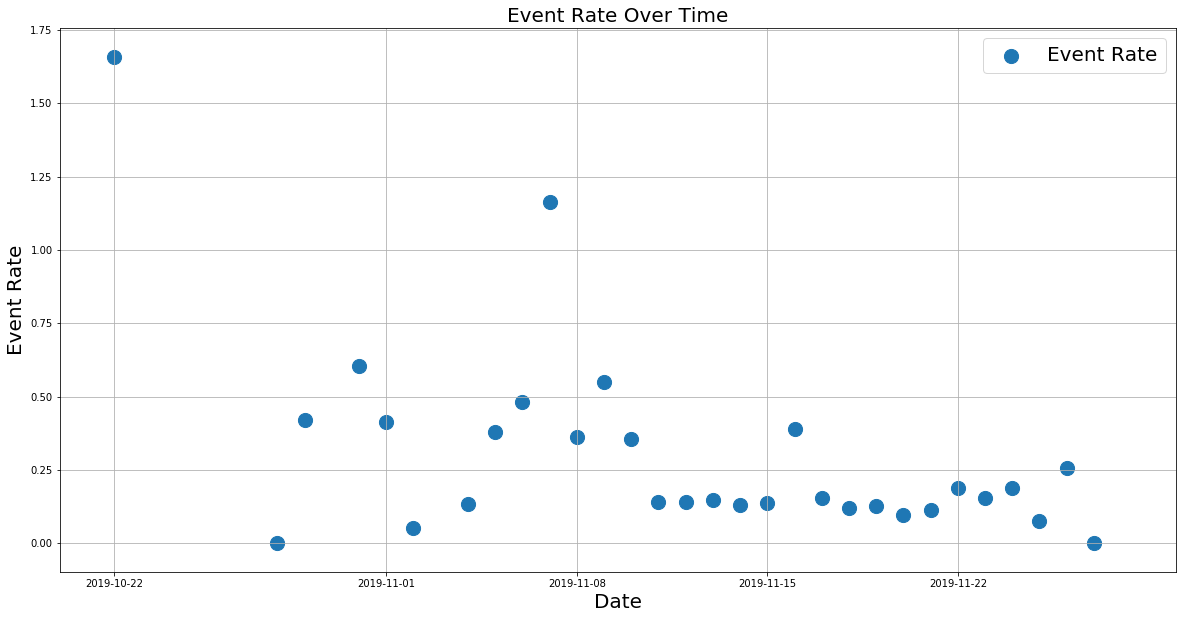

In [5]:
# Plot event rate over time.
plt.figure(figsize=(20,10))
plt.scatter(x=test_data["start_date"], y=test_data["event_rate"],label="Event Rate", s=200, \
            cmap='viridis',vmin=0,vmax=1)
plt.grid(True)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Event Rate', fontsize=20)
plt.xlim("2019-10-20", "2019-11-30")
plt.title("Event Rate Over Time", fontsize=20)
leg = plt.legend(fancybox='true',loc='upper right',ncol=2, fontsize=20)
leg.get_frame().set_alpha(0.8)
plt.draw()